##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

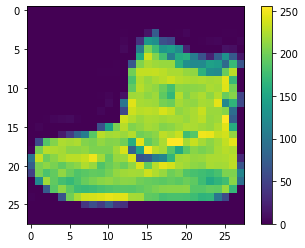

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

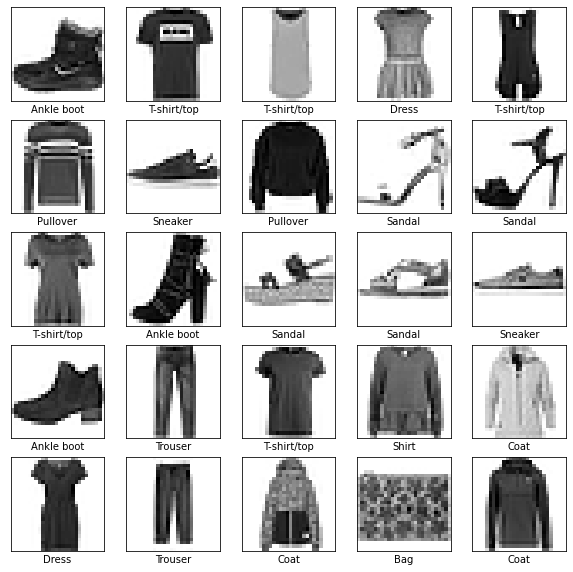

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4975 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3712 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3351 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2937 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2792 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2470 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3382 - accuracy: 0.8838 - 513ms/epoch - 2ms/step

Test accuracy: 0.8838000297546387


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([1.5027425e-07, 2.0847919e-07, 4.9348769e-06, 9.0267882e-09,
       1.4482279e-07, 4.7663831e-05, 2.0744799e-06, 1.3498746e-02,
       2.9796527e-07, 9.8644572e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

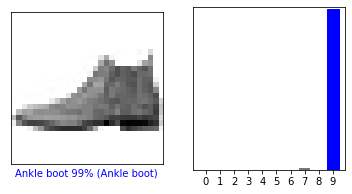

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

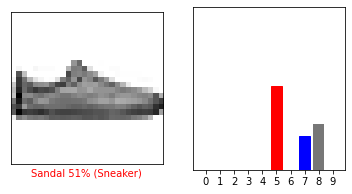

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

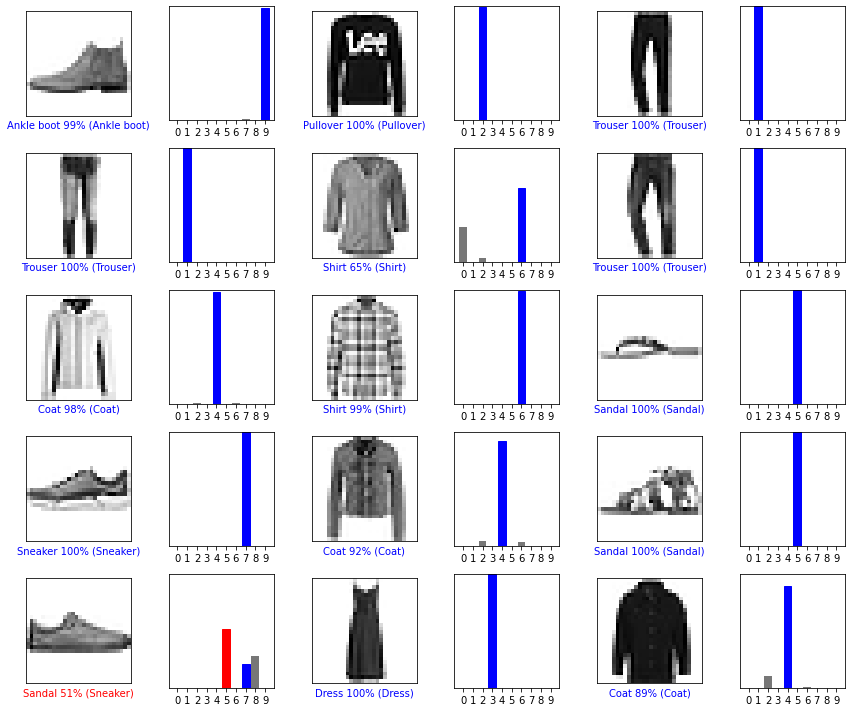

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.76844457e-05 1.03563642e-12 9.97285247e-01 5.09519040e-08
  4.34699061e-04 2.17370465e-16 2.25239363e-03 1.07577403e-17
  3.06906478e-09 1.13606095e-11]]


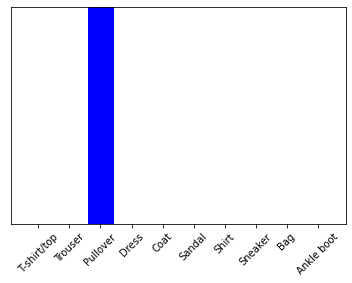

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

Task2 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import classification_report


In [ ]:
from sklearn.model_selection import KFold
inputs = np.concatenate((train_images, test_images), axis=0)
targets = np.concatenate((train_labels, test_labels), axis=0)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11200/11200 [==============================] - 173s 15ms/step - loss: 0.3757 - accuracy: 0.8619 - val_loss: 0.3077 - val_accuracy: 0.8839
Epoch 2/20
11200/11200 [==============================] - 172s 15ms/step - loss: 0.2614 - accuracy: 0.9031 - val_loss: 0.2846 - val_accuracy: 0.8909
Epoch 3/20
11200/11200 [==============================] - 170s 15ms/step - loss: 0.2279 - accuracy: 0.9159 - val_loss: 0.2526 - val_accuracy: 0.9080
Epoch 4/20
11200/11200 [==============================] - 168s 15ms/step - loss: 0.2051 - accuracy: 0.9237 - val_loss: 0.3085 - val_accuracy: 0.8961
Epoch 5/20
11200/11200 [==============================] - 170s 15ms/step - loss: 0.1881 - accuracy: 0.9309 - val_loss: 0.2729 - val_accuracy: 0.9035
Epoch 6/20
11200/11200 [==============================] - 171s 15ms/step - loss: 0.1760 - accuracy: 0.9349 - val_loss: 0.2839 - val_accuracy: 0.9116
Epoch 7/20
11200/11200 [==============================] - 172s 15ms/step - loss: 0.1625 - accuracy: 0.9396 - val_loss

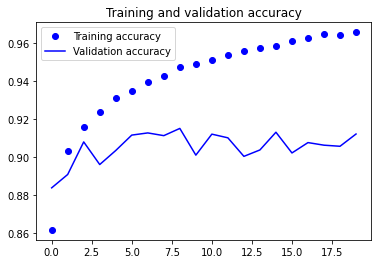

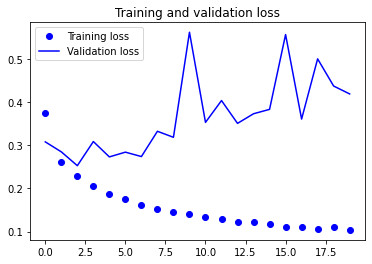

Found 12748 correct labels


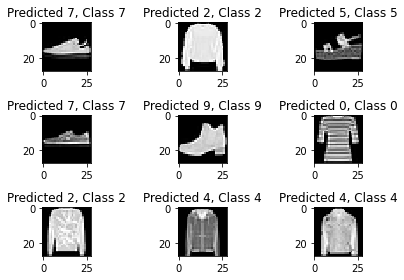

Found 1252 incorrect labels


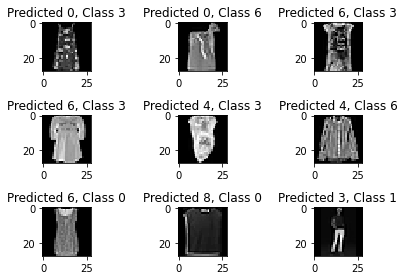

              precision    recall  f1-score   support

     Class 0       0.80      0.86      0.83      1373
     Class 1       0.99      0.99      0.99      1418
     Class 2       0.88      0.85      0.87      1425
     Class 3       0.91      0.90      0.91      1386
     Class 4       0.85      0.87      0.86      1379
     Class 5       0.99      0.98      0.98      1423
     Class 6       0.78      0.73      0.75      1399
     Class 7       0.96      0.96      0.96      1379
     Class 8       0.99      0.98      0.98      1411
     Class 9       0.96      0.98      0.97      1407

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11200/11200 [==============================] - 183s 16ms/step - loss: 0.3783 - accuracy: 0.8611 - val_loss: 0.2650 - val_accuracy: 0.9018
Epoch 2/20
11200/11200 [==============================] - 180s 16ms/step - loss: 0.2663 - accuracy: 0.9011 - val_loss: 0.2666 - val_accuracy: 0.9036
Epoch 3/20
11200/11200 [==============================] - 184s 16ms/step - loss: 0.2329 - accuracy: 0.9141 - val_loss: 0.2565 - val_accuracy: 0.9064
Epoch 4/20
11200/11200 [==============================] - 181s 16ms/step - loss: 0.2098 - accuracy: 0.9215 - val_loss: 0.2463 - val_accuracy: 0.9111
Epoch 5/20
11200/11200 [==============================] - 185s 17ms/step - loss: 0.1901 - accuracy: 0.9281 - val_loss: 0.2658 - val_accuracy: 0.9081
Epoch 6/20
11200/11200 [==============================] - 184s 16ms/step - loss: 0.1746 - accuracy: 0.9364 - val_loss: 0.2509 - val_accuracy: 0.9160
Epoch 7/20
11200/11200 [==============================] - 186s 17ms/step - loss: 0.1640 - accuracy: 0.9390 - val_loss

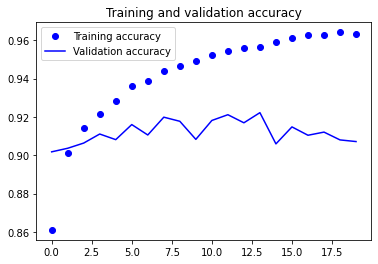

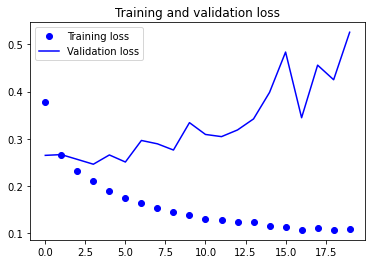

Found 12700 correct labels


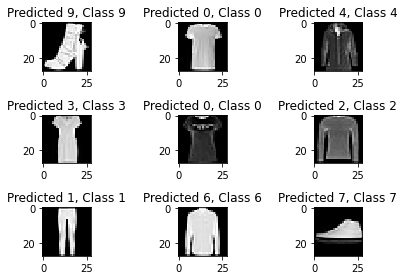

Found 1300 incorrect labels


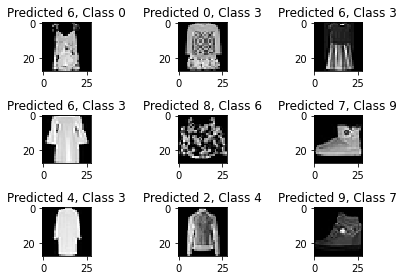

              precision    recall  f1-score   support

     Class 0       0.89      0.78      0.84      1437
     Class 1       0.99      0.99      0.99      1398
     Class 2       0.84      0.89      0.86      1385
     Class 3       0.93      0.89      0.91      1438
     Class 4       0.86      0.86      0.86      1427
     Class 5       0.96      0.99      0.98      1378
     Class 6       0.72      0.78      0.75      1346
     Class 7       0.95      0.97      0.96      1382
     Class 8       0.98      0.98      0.98      1395
     Class 9       0.98      0.95      0.96      1414

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11200/11200 [==============================] - 199s 18ms/step - loss: 0.3775 - accuracy: 0.8609 - val_loss: 0.3135 - val_accuracy: 0.8854
Epoch 2/20
11200/11200 [==============================] - 196s 18ms/step - loss: 0.2635 - accuracy: 0.9023 - val_loss: 0.2633 - val_accuracy: 0.9002
Epoch 3/20
11200/11200 [==============================] - 193s 17ms/step - loss: 0.2275 - accuracy: 0.9149 - val_loss: 0.2437 - val_accuracy: 0.9154
Epoch 4/20
11200/11200 [==============================] - 197s 18ms/step - loss: 0.2063 - accuracy: 0.9233 - val_loss: 0.2534 - val_accuracy: 0.9093
Epoch 5/20
11200/11200 [==============================] - 192s 17ms/step - loss: 0.1851 - accuracy: 0.9303 - val_loss: 0.2697 - val_accuracy: 0.9101
Epoch 6/20
11200/11200 [==============================] - 195s 17ms/step - loss: 0.1755 - accuracy: 0.9345 - val_loss: 0.2542 - val_accuracy: 0.9151
Epoch 7/20
11200/11200 [==============================] - 193s 17ms/step - loss: 0.1612 - accuracy: 0.9396 - val_loss

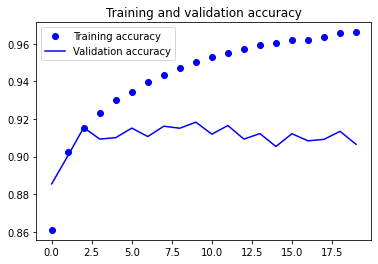

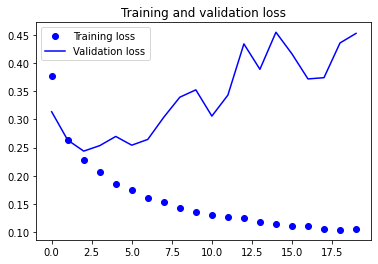

Found 12682 correct labels


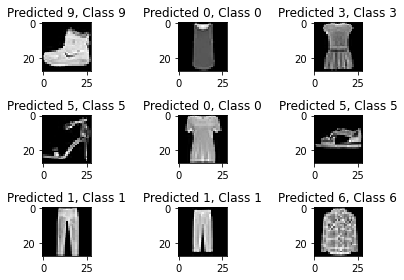

Found 1318 incorrect labels


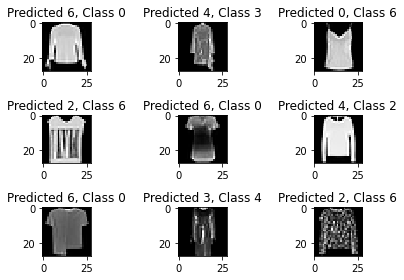

              precision    recall  f1-score   support

     Class 0       0.84      0.81      0.83      1390
     Class 1       0.99      0.98      0.99      1385
     Class 2       0.89      0.82      0.85      1392
     Class 3       0.90      0.92      0.91      1398
     Class 4       0.83      0.89      0.86      1390
     Class 5       0.98      0.99      0.98      1408
     Class 6       0.73      0.76      0.75      1382
     Class 7       0.97      0.92      0.95      1447
     Class 8       0.98      0.99      0.98      1400
     Class 9       0.94      0.98      0.96      1408

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11200/11200 [==============================] - 184s 16ms/step - loss: 0.3774 - accuracy: 0.8632 - val_loss: 0.2763 - val_accuracy: 0.8984
Epoch 2/20
11200/11200 [==============================] - 232s 21ms/step - loss: 0.2622 - accuracy: 0.9032 - val_loss: 0.2814 - val_accuracy: 0.8907
Epoch 3/20
11200/11200 [==============================] - 232s 21ms/step - loss: 0.2294 - accuracy: 0.9156 - val_loss: 0.2462 - val_accuracy: 0.9111
Epoch 4/20
11200/11200 [==============================] - 235s 21ms/step - loss: 0.2059 - accuracy: 0.9236 - val_loss: 0.2821 - val_accuracy: 0.9055
Epoch 5/20
11200/11200 [==============================] - 234s 21ms/step - loss: 0.1901 - accuracy: 0.9288 - val_loss: 0.2877 - val_accuracy: 0.9081
Epoch 6/20
11200/11200 [==============================] - 231s 21ms/step - loss: 0.1762 - accuracy: 0.9352 - val_loss: 0.2573 - val_accuracy: 0.9159
Epoch 7/20
11200/11200 [==============================] - 232s 21ms/step - loss: 0.1642 - accuracy: 0.9384 - val_loss

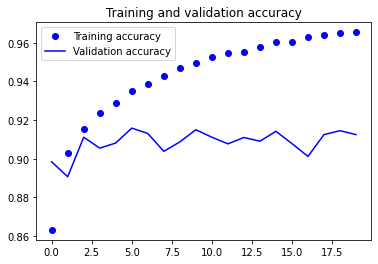

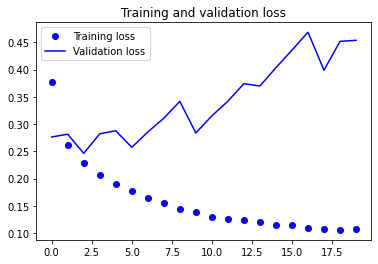

Found 12763 correct labels


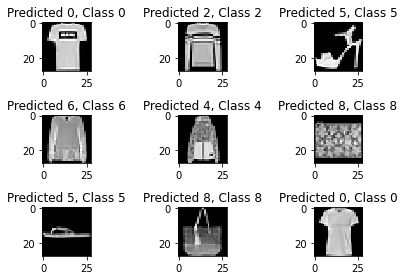

Found 1237 incorrect labels


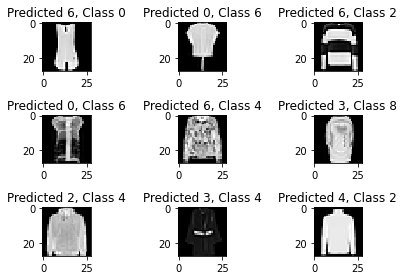

              precision    recall  f1-score   support

     Class 0       0.81      0.88      0.84      1429
     Class 1       0.99      0.99      0.99      1368
     Class 2       0.90      0.82      0.86      1383
     Class 3       0.92      0.91      0.91      1404
     Class 4       0.83      0.89      0.86      1409
     Class 5       0.99      0.98      0.98      1434
     Class 6       0.79      0.74      0.76      1441
     Class 7       0.95      0.97      0.96      1351
     Class 8       0.99      0.98      0.99      1390
     Class 9       0.97      0.96      0.97      1391

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11200/11200 [==============================] - 200s 18ms/step - loss: 0.3731 - accuracy: 0.8619 - val_loss: 0.3028 - val_accuracy: 0.8902
Epoch 2/20
11200/11200 [==============================] - 196s 17ms/step - loss: 0.2604 - accuracy: 0.9034 - val_loss: 0.2624 - val_accuracy: 0.9068
Epoch 3/20
11200/11200 [==============================] - 194s 17ms/step - loss: 0.2277 - accuracy: 0.9151 - val_loss: 0.2834 - val_accuracy: 0.8979
Epoch 4/20
11200/11200 [==============================] - 196s 17ms/step - loss: 0.2058 - accuracy: 0.9234 - val_loss: 0.2530 - val_accuracy: 0.9092
Epoch 5/20
11200/11200 [==============================] - 198s 18ms/step - loss: 0.1873 - accuracy: 0.9303 - val_loss: 0.2537 - val_accuracy: 0.9139
Epoch 6/20
11200/11200 [==============================] - 196s 18ms/step - loss: 0.1754 - accuracy: 0.9349 - val_loss: 0.2846 - val_accuracy: 0.9133
Epoch 7/20
11200/11200 [==============================] - 197s 18ms/step - loss: 0.1641 - accuracy: 0.9381 - val_loss

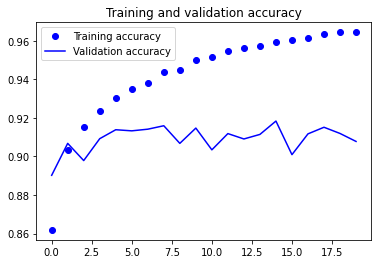

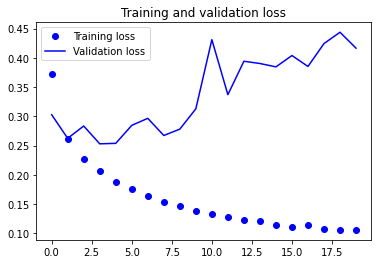

Found 12684 correct labels


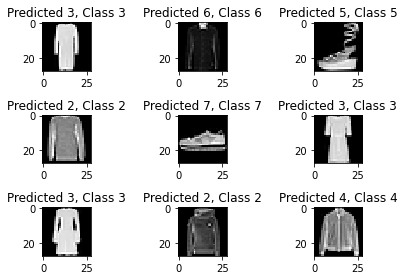

Found 1316 incorrect labels


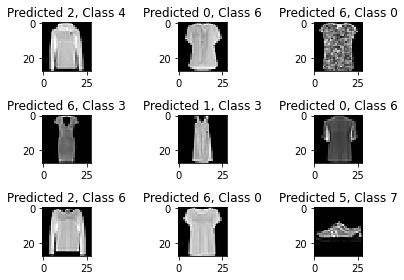

              precision    recall  f1-score   support

     Class 0       0.83      0.81      0.82      1371
     Class 1       0.99      0.99      0.99      1431
     Class 2       0.89      0.83      0.86      1415
     Class 3       0.96      0.84      0.89      1374
     Class 4       0.82      0.91      0.86      1395
     Class 5       0.99      0.98      0.98      1357
     Class 6       0.71      0.78      0.75      1432
     Class 7       0.96      0.97      0.96      1441
     Class 8       0.98      0.99      0.98      1404
     Class 9       0.98      0.96      0.97      1380

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



In [ ]:
"""5-fold"""

fold_no = 1
batch_size = 5
epochs = 25

acc_per_fold = []
perf_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

for train, test in kfold.split(inputs, targets):
    
  Ebatch_size = 64
  epochs = 20
  num_classes = 10

  fashion_model = Sequential()
  fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
  fashion_model.add(LeakyReLU(alpha=0.1))
  fashion_model.add(MaxPooling2D((2, 2),padding='same'))
  fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
  fashion_model.add(LeakyReLU(alpha=0.1))
  fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
  fashion_model.add(LeakyReLU(alpha=0.1))                  
  fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  fashion_model.add(Flatten())
  fashion_model.add(Dense(128, activation='linear'))
  fashion_model.add(LeakyReLU(alpha=0.1))                  
  fashion_model.add(Dense(10, activation='softmax'))

  fashion_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
  fashion_train = fashion_model.fit(inputs[train], targets[train], batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(inputs[test], targets[test]))

  test_eval = fashion_model.evaluate(inputs[test], targets[test], verbose=0)

  print('Test loss:', test_eval[0])
  print('Test accuracy:', test_eval[1])

  accuracy = fashion_train.history['accuracy']
  val_accuracy = fashion_train.history['val_accuracy']
  loss = fashion_train.history['loss']
  val_loss = fashion_train.history['val_loss']
  epochs = range(len(accuracy))
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

  predicted_classes = fashion_model.predict(inputs[test])

  predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

  correct = np.where(predicted_classes==targets[test])[0]
  print("Found %d correct labels" % len(correct))
  for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(inputs[test][correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], targets[test][correct]))
    plt.tight_layout()

  plt.show()

  incorrect = np.where(predicted_classes!=targets[test])[0]
  print("Found %d incorrect labels" % len(incorrect))
  for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(inputs[test][incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], targets[test][incorrect]))
    plt.tight_layout()
  plt.show()




  target_names = ["Class {}".format(i) for i in range(num_classes)]
  print(classification_report(targets[test], predicted_classes, target_names=target_names))



Task3

In [ ]:
from __future__ import print_function

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import backend as k
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, roc_curve

In [ ]:
BATCH_SIZE = 32 
EPOCH = 10
NUMBER_OF_CLASSES = 10 
IMG_ROWS, IMG_COLS = 28, 28 
INPUT_SHAPE = (IMG_ROWS, IMG_COLS,1)
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()


if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, IMG_ROWS, IMG_COLS)
    x_test = x_test.reshape(x_test.shape[0], 1, IMG_ROWS, IMG_COLS)
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS,1)
else:
    x_train = x_train.reshape(x_train.shape[0],IMG_ROWS, IMG_COLS, 1)
    x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, 1)
    INPUT_SHAPE = ( IMG_ROWS, IMG_COLS,1)
    

# normalize the train and test data 
x_train = x_train / 255.0
x_test = x_test / 255.0

print('the test shape', x_train.shape)
print('the train shape', x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
the test shape (60000, 28, 28, 1)
the train shape (10000, 28, 28, 1)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUMBER_OF_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUMBER_OF_CLASSES)

In [ ]:
model = Sequential()

model.add(
    Conv2D(32, kernel_size = (3,3),
    activation= 'relu', input_shape = INPUT_SHAPE) )
model.add(Conv2D(64, kernel_size = (3,3),
             activation= 'relu')) 
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten()) 
model.add(Dense(100,  activation='relu')) 
model.add(Dense(NUMBER_OF_CLASSES,  activation= 'softmax'))
    


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 100)               921700    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

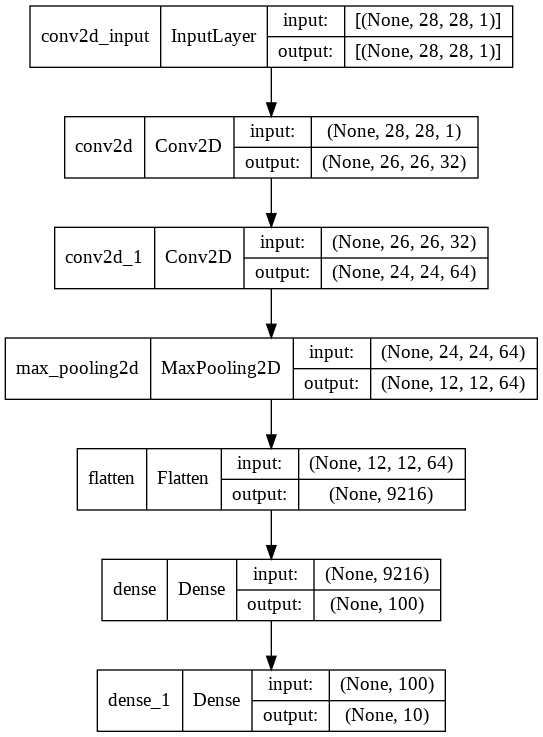

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss= keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCH,
            verbose=1 , validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 168s 89ms/step - loss: 0.1755 - accuracy: 0.9466 - val_loss: 0.0735 - val_accuracy: 0.9763
Epoch 2/10
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.0396 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0395 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0371 - val_accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0391 - val_accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0359 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss=',score[0])
print('Test_accuarcy',score[1])

Test loss= 0.03767497465014458
Test_accuarcy 0.9890999794006348


In [ ]:
y_pred = model.predict(x_test, batch_size=BATCH_SIZE)
y_pred = np.argmax(np.round(y_pred),axis=1)